## Forest Cover Type Classification problem


----
## Table of Contents

- [Problem and Data Description](#description)
    - [Problem definition](#Problem-definition)
    - [Classes](#Classes)
    - [Features](#Features)
- [Libraries](#Libraries)
- [Code Start](#Begining-of-code)
    - [Data Exploration](#Data-exploration)
    - [Feature Statistics](#Feature-Statistics)
        - [Numerical features Statistics](#Numerical-features-Statistics)
        - [Categorical features Statistics](#Categorical-features-Statistics)
        - [Skewness](#Skewness)
        - [Cover_Type Distribution](#Target_Distribution)
    - [Data Visualizations](#Data-Visualizations)
        - [Class Distribution](#Class-Distribution)
        - [Categorical Features Distribution](#categorical-feature-distribution)
        - [Correlation (Numerical) ](#numerical-features-correlation)
        - [High-Correlation Scatterplot](#high-correlation-scatterplot)
        - [Numerical Features Distribution](#Numerical-Features-Distribution)
        - [Feature against Class comparison](#feature-against-class-comparison)
    - [Data Cleaning & Checking](#data-cleaning)
        - [Category Erorrs Check](#category-error-check)
        - [Null Values Check](#null-values-check)
        - [Duplicates Check](#duplicates-check)
    - [Feature-Reduction](#Feature-Reduction)
        - [Feature Importance](#Feature-Importance)
            - [Random Forest Classifier](#Random-Forest-Classifier)
            - [Extra Trees Classifier](#Extra-trees-classifier)
            - [Gradient Boosting Classifier](#gradient-boosting-classifier)
            - [Adaboost Classifier](#adaboost-classifier)
            - [CatBoost Classifier](#catboost-classifier)
        - [Feature Scaling](#numerical-feature-scaling)
        - [Balancing Dataset](#balancing-dataset)
    - [SVM Evaluation](#svm-evaluation)
        - [SVM On Balanced Set](#svm-on-balanced-dataset)
            - [HyperParamater Tuning](#hyperparameter-tuning)
                - [Randomized Search](#using-randomizedsearchcv)
                - [Grid Search](#using-gridsearchcv)
                - [Balanced Set Conclusion](#balanced-data-conclusion)
        - [SVM On Unbalanced Set](#svm-on-the-unbalanced-dataset)
            - [With Weight Paramater](#svm-using-weighted-parameter)
                - [Weight Calculation](#class-weight-calculation)
                - [Unabalnced Set (Class Weights) conclusion](#conlusion-with-weight-paramaters-unbalanced)
            - [Without Weight Paramater](#svm-without-weight-parameters-unabalcned)
        - [All Models Evaluation](#All-Models-Evaluation)
    - [Conclusion](#conclusion)
    - [Notes](#notes)


    
    


    


    

----


### Problem and Data Description
- The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.
- Each observation is a 30m x 30m patch. 

#### Problem definition
We are given a total of `54` features and we are supposed to predict the forest cover type which consists of `7` classes `multi-class Classification`

#### Classes
The seven forest cover types are the following represented by `integers 1 to 7`:
- 1 - Spruce/Fir
- 2 - Lodgepole Pine
- 3 - Ponderosa Pine
- 4 - Cottonwood/Willow
- 5 - Aspen
- 6 - Douglas-fir
- 7 - Krummholz


#### Features
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth 



- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

##### The `Categorical features` **Wilderness_Area** and **Soil_Type**
| Wilderness_Areas | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |
----

### Libraries

In [72]:
# Importing required libraries for the project

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import StandardScaler

In [18]:
# ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

# setting columns to none so we can see all columns(features) in our display
pd.set_option('display.max_columns', None)

### Begining of code

#### Data Exploration
importing the dataset 

In [87]:
from sklearn.datasets import fetch_covtype
covertype = fetch_covtype()
X = covertype.data
y = covertype.target
data = pd.DataFrame(data = X, columns=covertype.feature_names).astype(int)
data['Cover_Type'] = covertype.target.astype(int)

looking at the first 5 rows of the dataset

In [20]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [21]:
#Shifting categorical features names by 1 so it starts with 1 instead of 0 so it matches the description above
# Renaming wilderness type columns

wilderness_columns = [f'Wilderness_Area_{i}' for i in range(4)]
new_wilderness_columns = [f'Wilderness_Area_{i+1}' for i in range(4)]

# Renaming soil type columns
soil_columns = [f'Soil_Type_{i}' for i in range(40)]
new_soil_columns = [f'Soil_Type_{i+1}' for i in range(40)]

# Creating a dictionary to map old column names to new column names
column_mapping = dict(zip(wilderness_columns + soil_columns, new_wilderness_columns + new_soil_columns))

# Renaming columns in the DataFrame
data.rename(columns=column_mapping, inplace=True)

Getting the shape of the dataset (observations, features)

In [22]:
observations, features = data.shape
# printing the #of observations and #of features excluding the last column which is the class
print(data.shape)
print(f'The number of observations = {observations} and the number features =  {features-1}') 

(581012, 55)
The number of observations = 581012 and the number features =  54


**we can see from the description above that the number of features is<br> very high and we are going to do Feature Selection and Feature Engineering later**

looking at datatypes and checking if any column has missing values the features to check if it is in appropriate form

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int32
 1   Aspect                              581012 non-null  int32
 2   Slope                               581012 non-null  int32
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int32
 4   Vertical_Distance_To_Hydrology      581012 non-null  int32
 5   Horizontal_Distance_To_Roadways     581012 non-null  int32
 6   Hillshade_9am                       581012 non-null  int32
 7   Hillshade_Noon                      581012 non-null  int32
 8   Hillshade_3pm                       581012 non-null  int32
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int32
 10  Wilderness_Area_1                   581012 non-null  int32
 11  Wilderness_Area_2                   581012 non-null 

Observation
- all features have the `right datatype` casted to int because they all integers
- First 10 Columns are `numerical_Features`
- The rest of the columns except the last one are `Categorical Features` that are `one-hot encoded` 
- last column is the `class` (target)

#### Feature Statistics 
now we are going to create two variables of type list
1. numerical_features : list of column names of numerical features
2. binary / categorical_features : list of column names of categorical featuresm

In [24]:
# splitting column names for further analysis
numerical_features = data.iloc[:, :10].columns
categorical_features = data.iloc[:, 10:-1].columns # excluding the class column 

#### Numerical features Statistics

In [25]:
numerical_desc = data[numerical_features].describe()
numerical_desc

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [26]:
# creating a variable to store mean and std row of numerical descriptions
mean = numerical_desc.iloc[1]
std = numerical_desc.iloc[2]
# getting the min mean and max mean for analysis
print("--------Analysis--------")
print(f'Mean: min = {mean.min():.0f} \t Mean max = {mean.max():.0f}\n')
# sorting STD 
print(f"Sorted STD: \n{std.sort_values(ascending=False)}")


--------Analysis--------
Mean: min = 14 	 Mean max = 2959

Sorted STD: 
Horizontal_Distance_To_Roadways       1559.254870
Horizontal_Distance_To_Fire_Points    1324.195210
Elevation                              279.984734
Horizontal_Distance_To_Hydrology       212.549356
Aspect                                 111.913721
Vertical_Distance_To_Hydrology          58.295232
Hillshade_3pm                           38.274529
Hillshade_9am                           26.769889
Hillshade_Noon                          19.768697
Slope                                    7.488242
Name: std, dtype: float64


- Mean of the features vary from as low as 14 to as high as 2959 having very different ranges (should be scaled later for SVM)
- `Horizontal_Distance_To_Roadways` and `Horizontal_Distance_To_Fire_Points` are the most spread numerical features followed by `Elevation`. The most densed feature and near to mean is `Slope` 
- The reason some features are so widely spread and having high values and some features don't is because 5 out of 10 variables are measured in meters, while  Features like `Aspect` and `Slope` are measured in degrees so its maximum value can't go above `360` and some are indexed from `0-255`

This will be more clear later in the [visualization](#data-visualizations) part below


#### Categorical features Statistics 
we can do this because they are of type int `one-hot encoded` and we can still interpret their statistics

In [27]:
categorical_desc = data[categorical_features].describe()
categorical_desc

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [28]:
# creating a variable to store mean and std row of categorical descriptions
mean = categorical_desc.iloc[1]
# std = categorical_desc.iloc[2]
print("-------- Categorical Analysis--------")
# sorting the mean values descending to analyze the stats
print(f'Sorted Mean: \n{mean.sort_values(ascending=False)[:20]}\n ') #printing first 10 features only since we have too many 


-------- Categorical Analysis--------
Sorted Mean: 
Wilderness_Area_1    0.448865
Wilderness_Area_3    0.436074
Soil_Type_29         0.198356
Soil_Type_23         0.099399
Soil_Type_32         0.090392
Soil_Type_33         0.077716
Wilderness_Area_4    0.063627
Soil_Type_22         0.057439
Soil_Type_10         0.056168
Soil_Type_30         0.051927
Soil_Type_12         0.051584
Wilderness_Area_2    0.051434
Soil_Type_31         0.044175
Soil_Type_24         0.036622
Soil_Type_13         0.030001
Soil_Type_38         0.026803
Soil_Type_39         0.023762
Soil_Type_11         0.021359
Soil_Type_4          0.021335
Soil_Type_20         0.015936
Name: mean, dtype: float64
 


Since the categorical features are binary and can only be 0 or 1.


**Considering `Wilderness_Area_`**
- `Wilderness_Area_1` has the most presence in the data set followed by `Wilderness_Area_3` with $0.44$ and $0.43$ respictively 
- `Wilderness_Area_2` has the least number of observations with probability only $0.05$
- This means that observations have around `44%` probability that it comes from `Wilderness_Area_1` and `43%` from `Wilderness_Area_3`
- we also observe that most observations have the feature `Soil_Type_29` with around `20%`probability

**More observations will be clearer in the [Feature Distribution](#feature-distribution) part below**



#### Skewness
Skewness is a measure of symmetry in a distribution.
- If the skewness is equal to zero, data is perfectly symmetrical (normal distribution, mean=median=mode).
- If skewness is positive, the data are positively skewed or skewed right (mean>median).
- If skewness is negative, the data are negatively skewed or skewed left (median>mean).
- Values close to 0 show less skew

In [29]:
# numerical features skew
data[numerical_features].skew()

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
dtype: float64

**Observation** 


1. `Elevation`: is negatively skewed indicating that there are more `high` elevation values with `a few` areas of low elevation
2. `Aspect`, `Slope`, and `Horizontal_Distance_To_Roadways` are mildly positively skewed indicating that the majority of the values are concentrated on the lower end
3. `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, and `Horizontal_Distance_To_Fire_Points`    are significantly high positive skewness indicating that most observations are relatively `close to water bodies `. `Vertical_Distance_To_Hydrology` indicates some areas significantly higher or lower in elevation than the nearest water body.
4. `Hillshade_9am` , `Hillshade_Noon` high negative skewness indicating that most areas receive `more` direct sunlight in the `morning` and `afternoon`, with `fewer` areas receiving `less`.
5. `Hillshade_3pm` A mild negative skew, indicating while most areas receive more sunlight in the afternoon, there are fewer areas that receive significantly less.

**More observations will be clearer in the [Data visualizations](#data-visualizations) part below**

### Target_Distribution

In [30]:
class_counts = data.Cover_Type.value_counts()
class_counts

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [31]:
# printing percentages of each class
for class_label, count in class_counts.items():
    percentage = (count / observations) * 100
    print(f"Class {class_label}: {percentage:.2f}%")

Class 2: 48.76%
Class 1: 36.46%
Class 3: 6.15%
Class 7: 3.53%
Class 6: 2.99%
Class 5: 1.63%
Class 4: 0.47%


**Observation**:- **`Distribution of classes is higly Inbalanced`**


- We can see that `Class 2 and Class 1` dominate the datasets with combined `495,141` observations which is around `85%` of the dataset
- We see that the `least`  present class:- `Class 4`  has only `2747` observations which is only `0.47%` of the dataset
- It is **`MANDATORY`** to handle this dataset `imabalnce` before running the data into `SVM` as this would affect the evaluation of the model significatly

shown below in this [plot](#class-distribution)


### Data Visualizations

#### Class Distribution

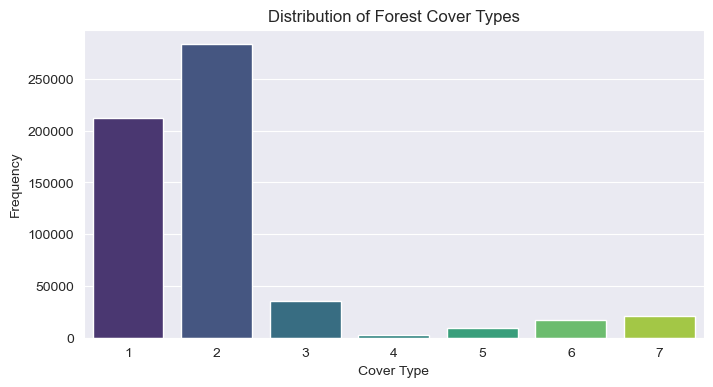

In [32]:
# plot 1 
# Histogram of class distribution

sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.countplot(x='Cover_Type', data=data, palette="viridis")
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.show()

As explained in [Target Distribtion](#target_distribution) the dataset is highly `imbalanced`

#### Categorical Feature Distribution


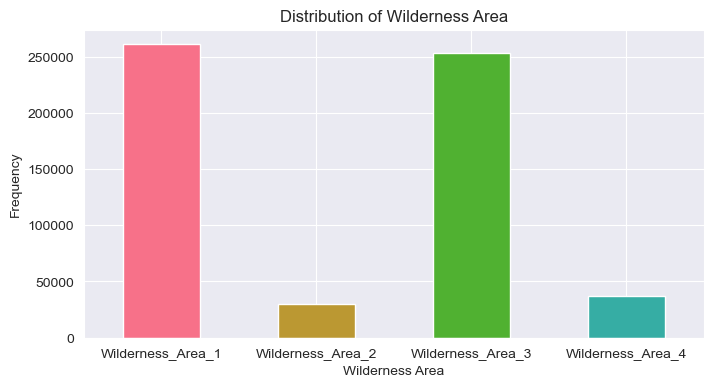

In [33]:
# plot 2 
# Histogram of Wilderness Area
wilderness_data_count = data[new_wilderness_columns].sum()
palette = sns.color_palette("husl")
plt.figure(figsize=(8, 4))
wilderness_data_count.plot(kind='bar', color = palette)
plt.title('Distribution of Wilderness Area')
plt.xlabel('Wilderness Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0) # for better label reading
plt.show()

In [34]:
wilderness_data_count

Wilderness_Area_1    260796
Wilderness_Area_2     29884
Wilderness_Area_3    253364
Wilderness_Area_4     36968
dtype: int64

**Observation**

- Most of the observations are from `Wilderness_Area_1` and `Wilderness_Area_3` as mentioned earlier while `Wilderness_area_2` with the least # of observations
- while the graph show that for `Wilderness_area_2` and `Wilderness_area_4` respectivel are very low, we can see from the count above that we stil have a good number of observations for both of these areas with `29,884` and `36968` respictevely


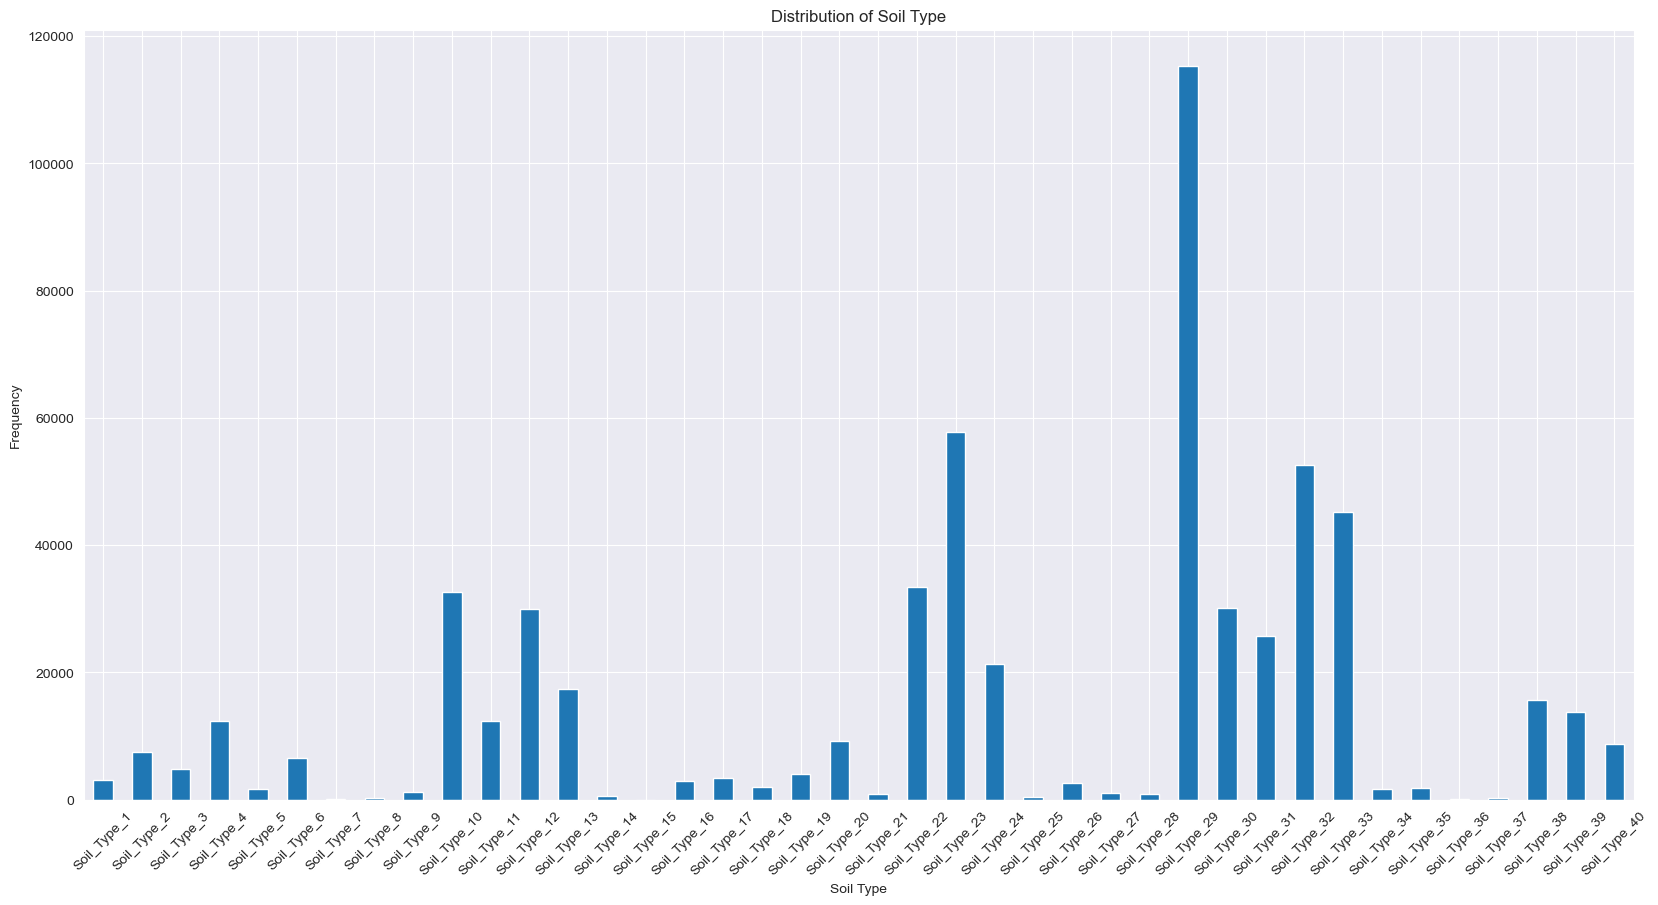

In [35]:
# plot 3 
# Histogram of soil_type
plt.figure(figsize=(20, 10))

soil_data_count = data[new_soil_columns].sum()
soil_data_count.plot(kind='bar')

plt.title('Distribution of Soil Type')
plt.xlabel('Soil Type', size = 10)
plt.ylabel('Frequency')
plt.xticks(rotation = 45, size = 10) # for better label reading
plt.show()

**Observation**:-

**It seems that the soil_types are from different clusters where each cluster has a different type of distribution**

**For Example**: 
- from `Soil_Type_1` to `Soil_Type_5` they follow a `normal distribution` while from `Soil_Type_34` to `Soil_Type_40` they are right skewed

**also notice that observations for `Soil_Type_7` and `Soil_Type_15` they have very minimal observations. Lets look at their count**


In [36]:
soil_data_count.sort_values()

Soil_Type_15         3
Soil_Type_7        105
Soil_Type_36       119
Soil_Type_8        179
Soil_Type_37       298
Soil_Type_25       474
Soil_Type_14       599
Soil_Type_21       838
Soil_Type_28       946
Soil_Type_27      1086
Soil_Type_9       1147
Soil_Type_5       1597
Soil_Type_34      1611
Soil_Type_35      1891
Soil_Type_18      1899
Soil_Type_26      2589
Soil_Type_16      2845
Soil_Type_1       3031
Soil_Type_17      3422
Soil_Type_19      4021
Soil_Type_3       4823
Soil_Type_6       6575
Soil_Type_2       7525
Soil_Type_40      8750
Soil_Type_20      9259
Soil_Type_4      12396
Soil_Type_11     12410
Soil_Type_39     13806
Soil_Type_38     15573
Soil_Type_13     17431
Soil_Type_24     21278
Soil_Type_31     25666
Soil_Type_12     29971
Soil_Type_30     30170
Soil_Type_10     32634
Soil_Type_22     33373
Soil_Type_33     45154
Soil_Type_32     52519
Soil_Type_23     57752
Soil_Type_29    115247
dtype: int64

**Some `soil_types` have very `few` observations which means they could be dropped and that they are not very beneficial for the model** <br>
This will be further discussed later in [Features Selection](#features-selection)            

#### Numerical Features Correlation
we will only see the correlation between the numerical features since the categorical features arew `binary`

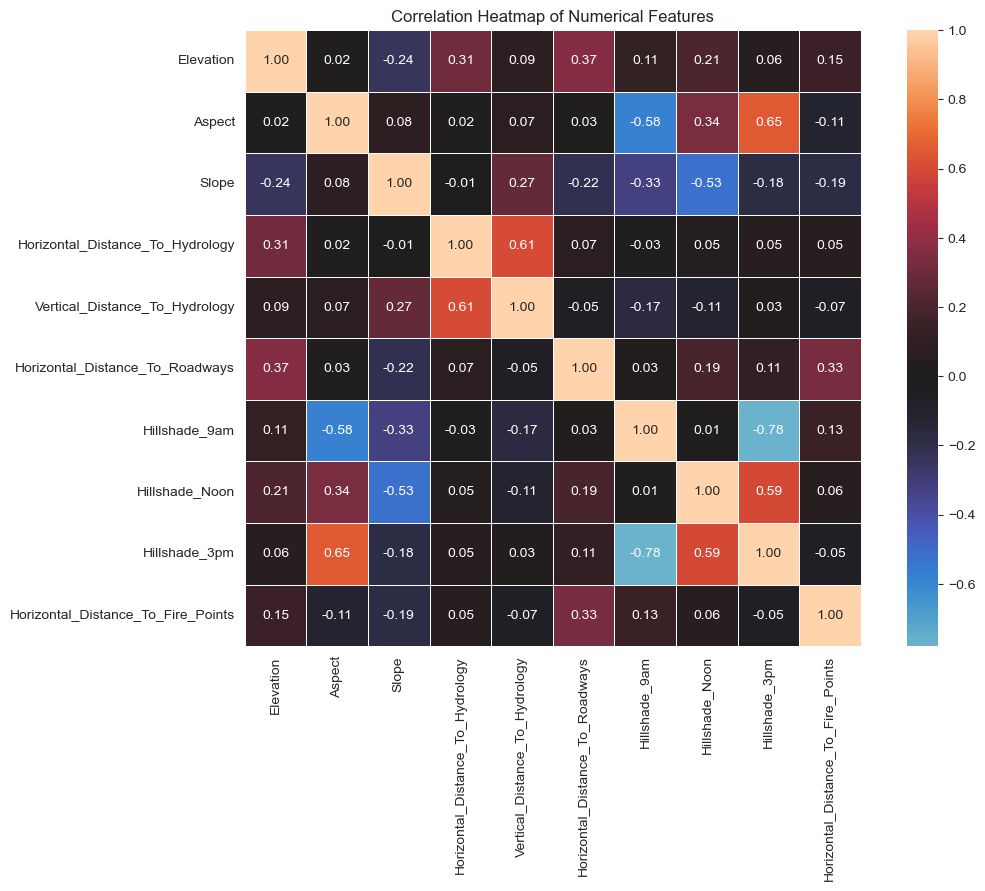

In [37]:
# plot 4
# Heatmap
# Correlation on numerical features 

corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True,center = 0, square=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

**Correlation Observations**
- `black`  indicate no correlation 
- `blue`  indicate high negative correlation
- `red/orange` indicate high positive correlation
----
- `Aspect & Hillshade_3pm` show `High Positive Correlation` This suggests that the aspect, or the compass direction that a slope faces, has a significant effect on the amount of sunlight it receives in the late afternoon.
- `Hillshade_3pm & Hillshade_9am` show `High Negative Correlation :- This could mean that areas that receive more sunlight in the morning (at 9 AM) tend to receive less in the afternoon (at 3 PM)
- `Many` Values show weak to no `correlation`(values close to 0)
-  it's important to consider that `correlation` does not imply `causation` and strongly correlated features might affect the model's performance

#### High-Correlation Scatterplot

In [38]:
# plot 5
# scatterplot pairwise  of highly correlated numerica features

In [39]:
# selecting only the highly correlated values with a threshold more than 0.5
threshold = 0.5
corr_list = []
length = len(numerical_features)
for i in range(0, length): #looping of rows
    for j in range(i+1, length): # looping of columns (ignoring repitions)
        value = corr_matrix.iloc[i,j] 
        if (threshold <= abs(value) <1): # values greated than threshold and less than threshold
            corr_list.append([value,i,j]) # appending corr values, row and column indices
corr_list

[[-0.5792729109405359, 1, 6],
 [0.6469439534956679, 1, 8],
 [-0.5269106396657895, 2, 7],
 [0.6062355059591138, 3, 4],
 [-0.7802959522807976, 6, 8],
 [0.5942736480372658, 7, 8]]

<Figure size 1800x1800 with 0 Axes>

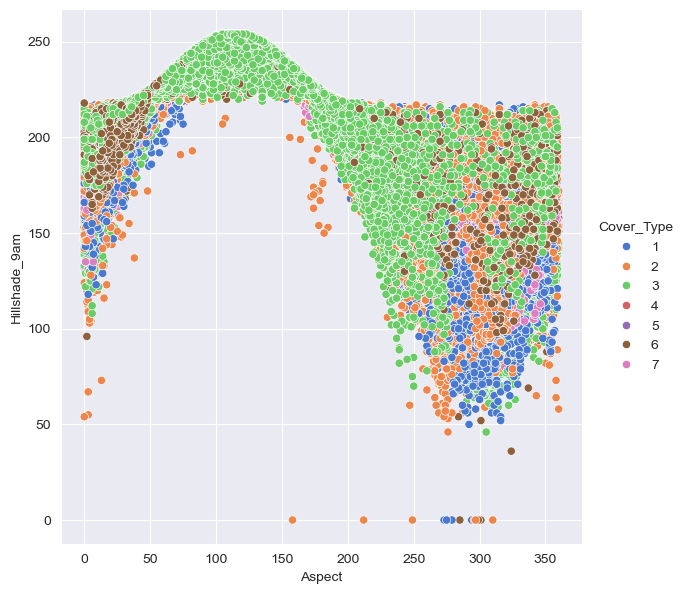

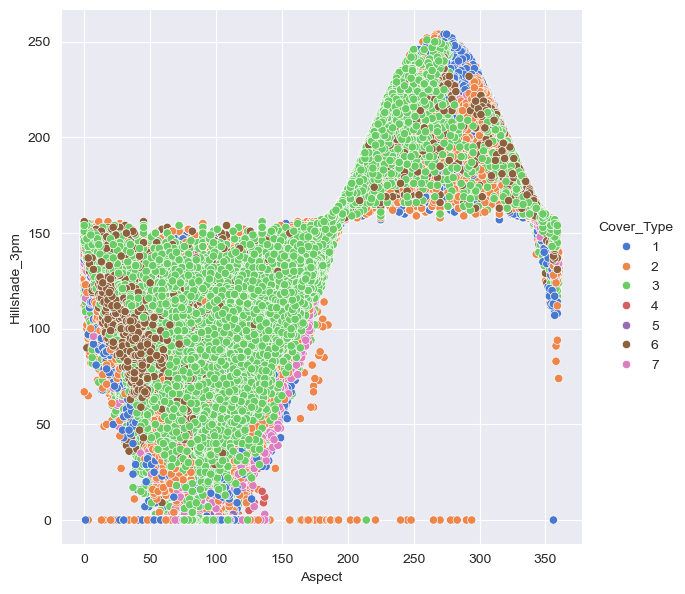

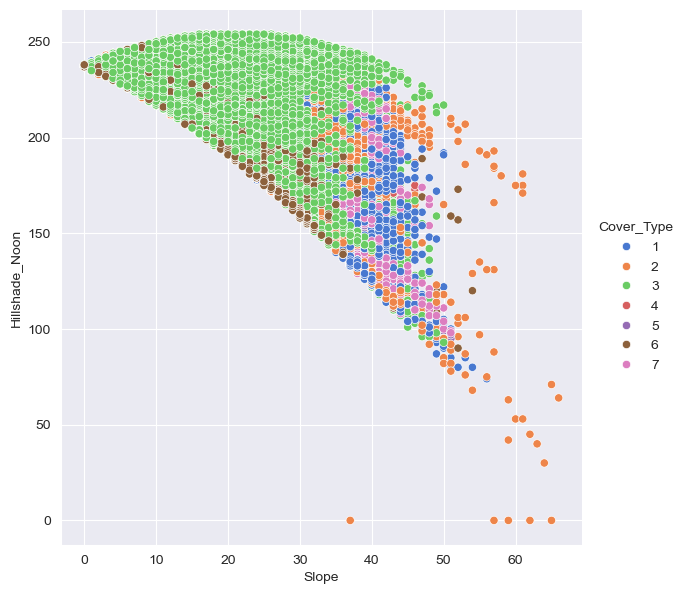

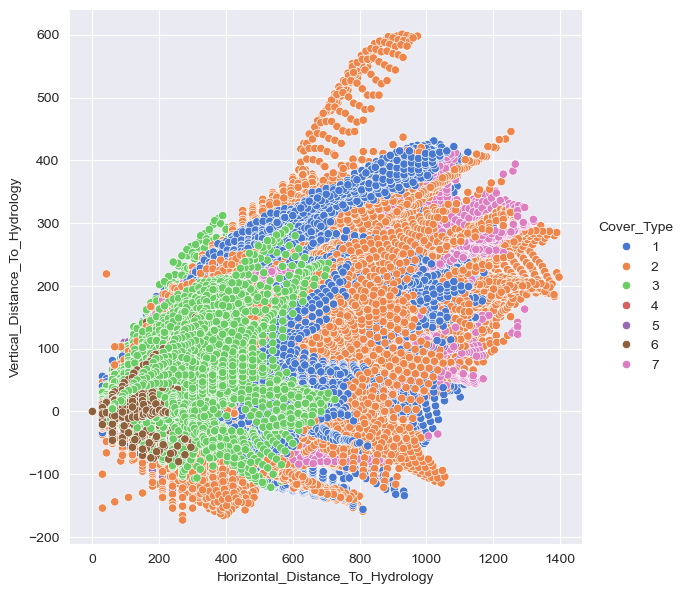

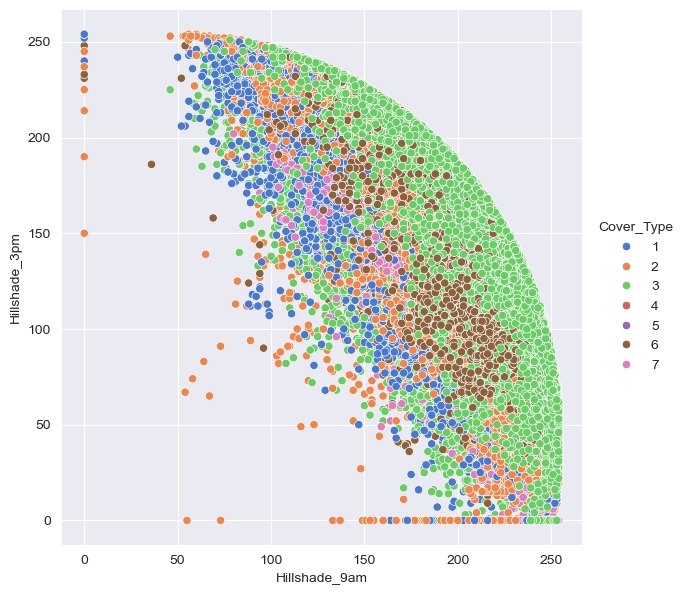

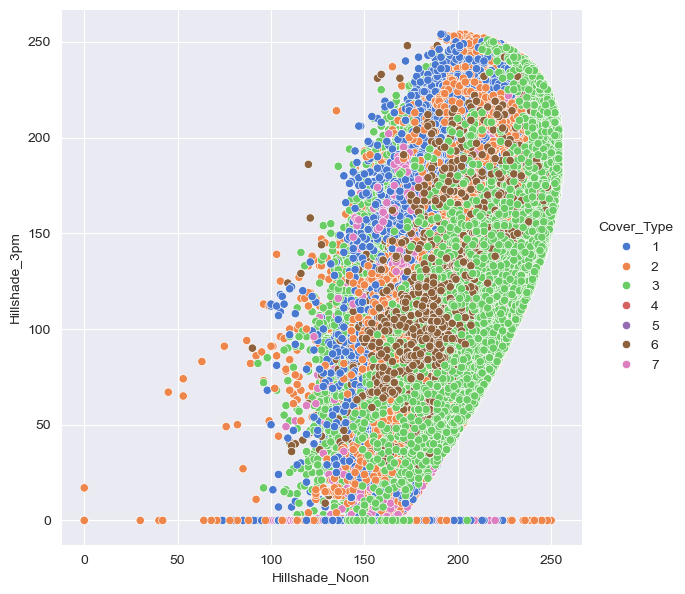

In [40]:
#plotting 
plt.figure(figsize=(18,18))
palette = sns.color_palette("muted")
for _,i,j in corr_list: 
    sns.pairplot(data = data, hue='Cover_Type', size= 6, x_vars=numerical_features[i], y_vars=numerical_features[j], palette=palette)
    plt.show()

**Observation**


`Correlation` is clearly visible as expected
- `Hillshade_9am and Aspect` and `Hillshade_3pm and Aspect` represent a `sigmoid function`
- `Vertical and Horizontal Distance to Hydrology` represent a `linear relationship` but not a single line could fit the points

#### Numerical-Features-Distribution

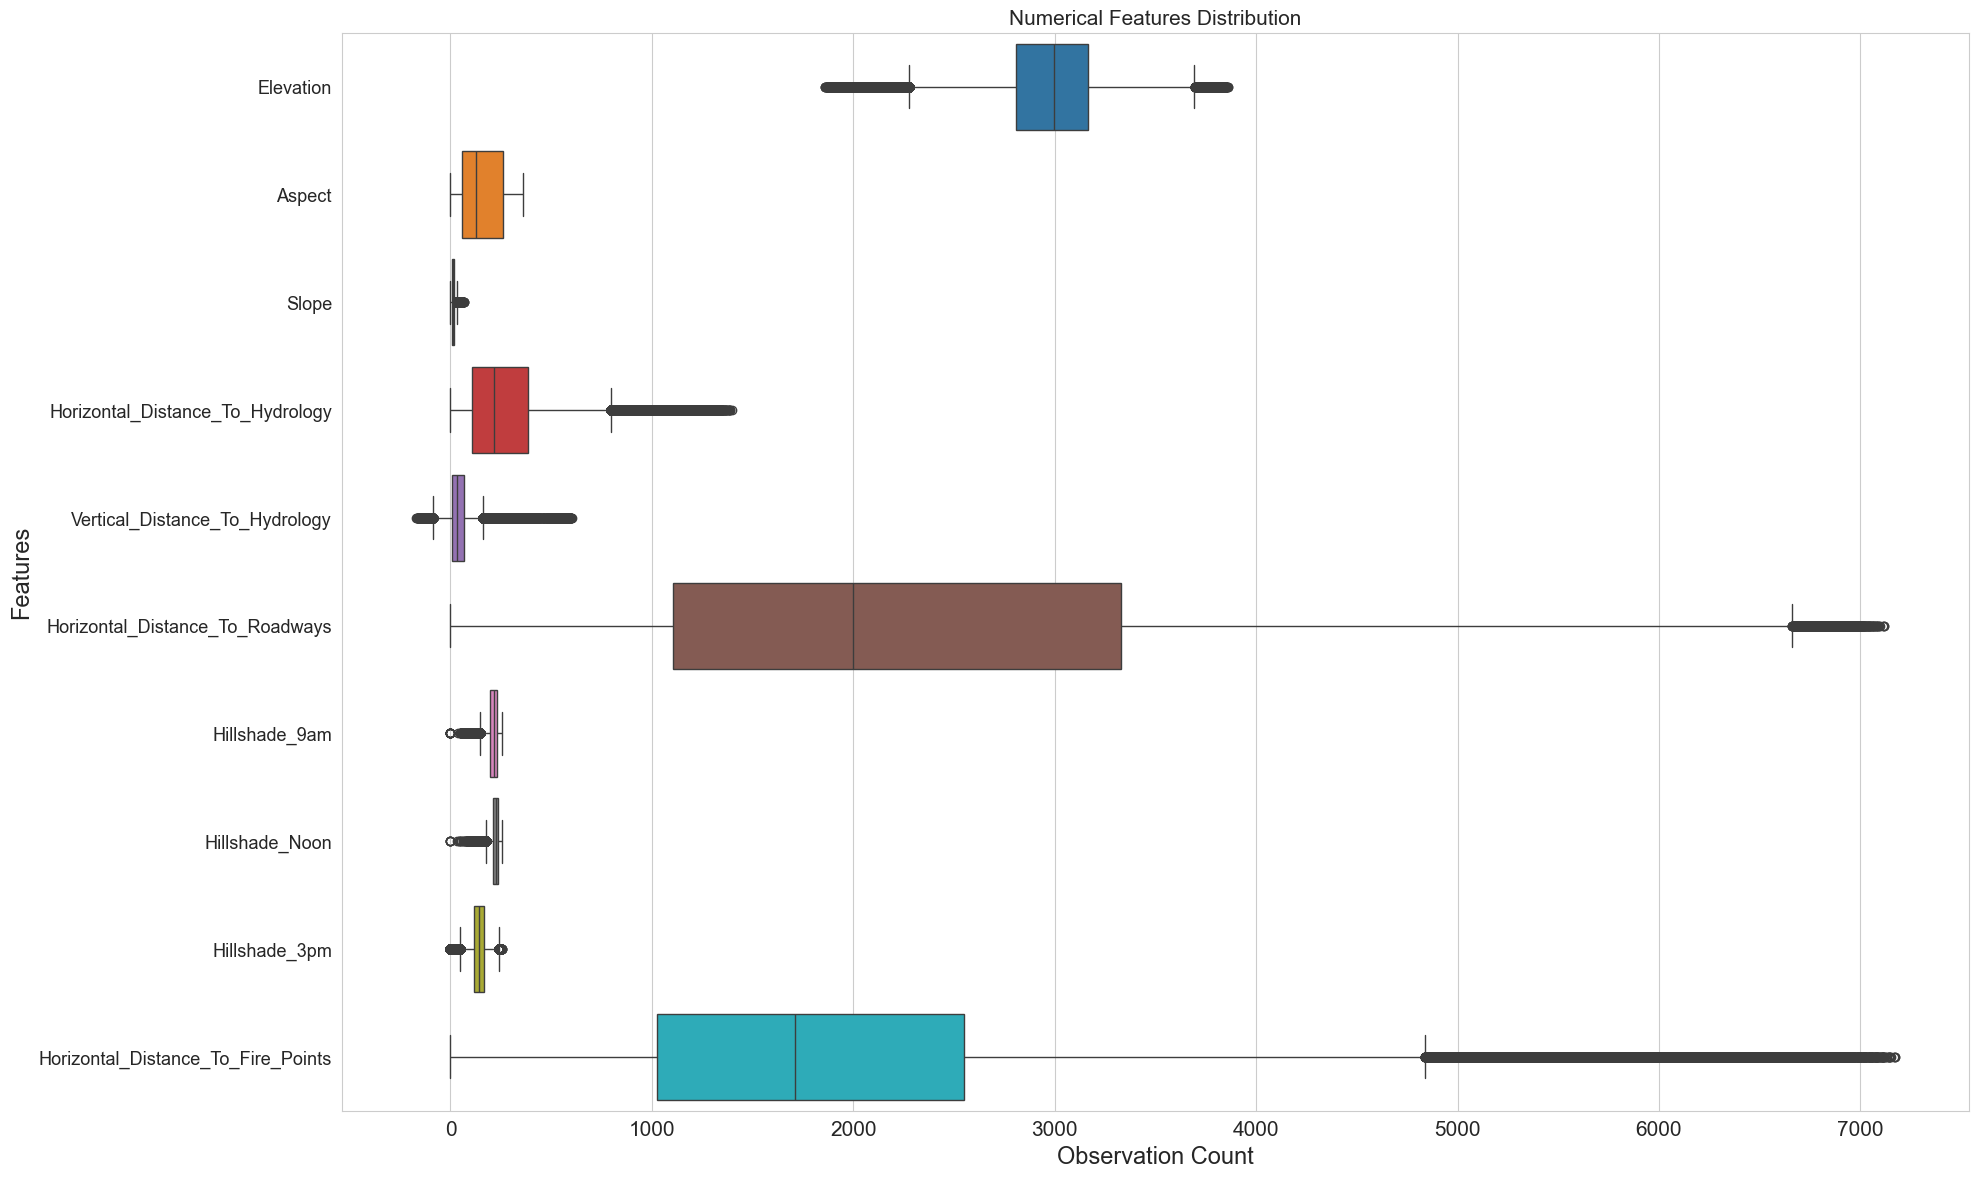

In [41]:
# Plot 6
# Box plot of (Numerical-Features-Distribution)


sns.set_style("whitegrid")

plt.figure(figsize=(21, 14))


sns.boxplot(data = data[numerical_features], orient='h')


# Title of the graph
plt.title('Numerical Features Distribution', size = 15)

# Horizontal axis Label
plt.xlabel('Observation Count', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

#adjusting tick size
plt.xticks(size = 15)
plt.yticks(size = 13)




plt.show()

**Feature Distibution `observation`**

as discussed before in the [Statistics](#feature-statistics) part above the graph confirms most of what we mentioned

- Aspect:- `uniformally distibuted` with no `outliers` (values spread out evenly)
- Slope:- Very squeezed with the least range of values compared to all features (lots of `outliers` on the high end)
- `Horizontal_Distance_To_Hydrology` and `Horizontal_Distance_To_Roadways` , `Horizontal_Distance_To_Fire_Points ` right `skewed` with significant outliers that are far from water / roadway / Fire points
- `Hillshade_9am`, `Hillshade_Noon`, and `Hillshade_3pm` have smaller ranges (indexed 0-255). their distributions that are slightly left-skewed (for 9am and noon) and right-skewed (for 3pm), with several outliers on the lower end

**Conlusion**:- each feature has different scale of measurement and the features shoud be normalized before using svm


#### Feature against Class comparison

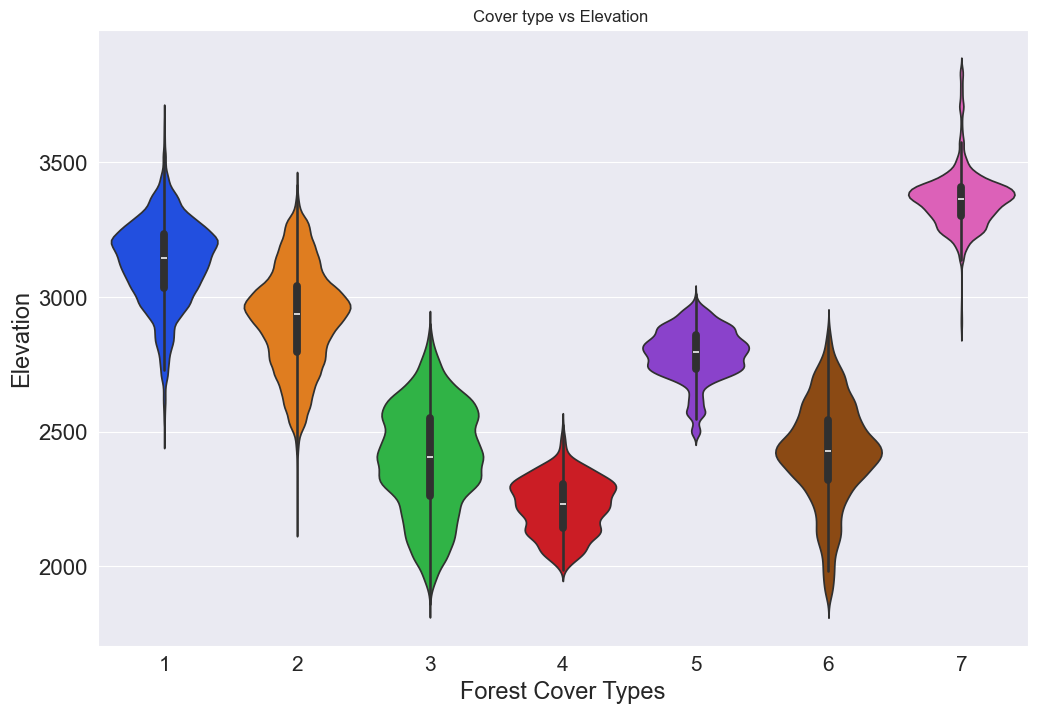

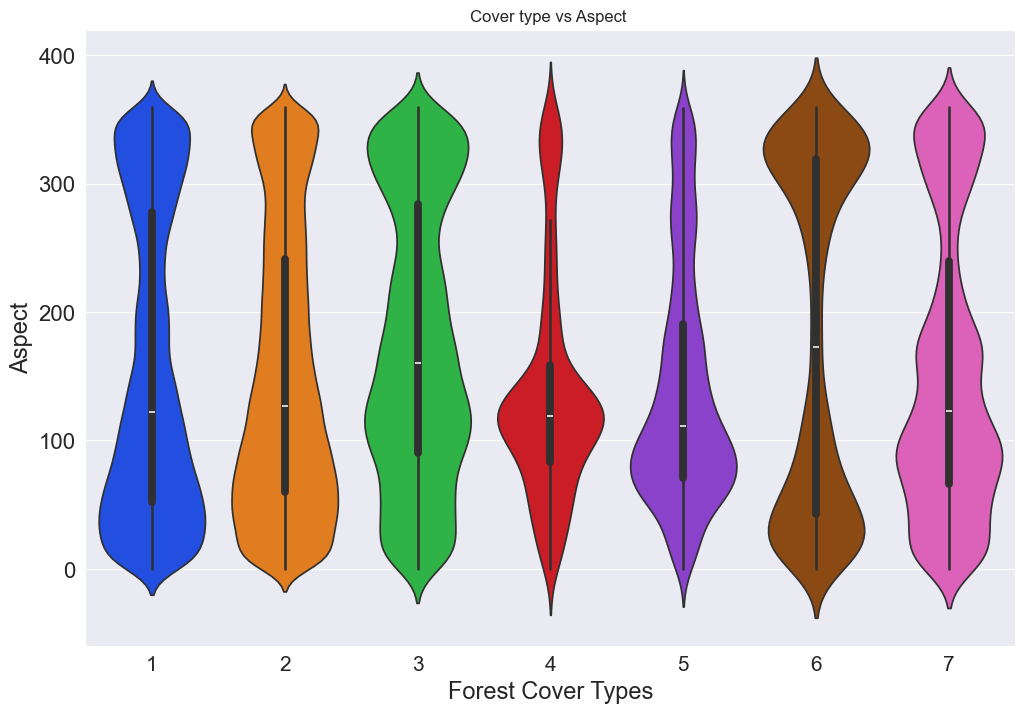

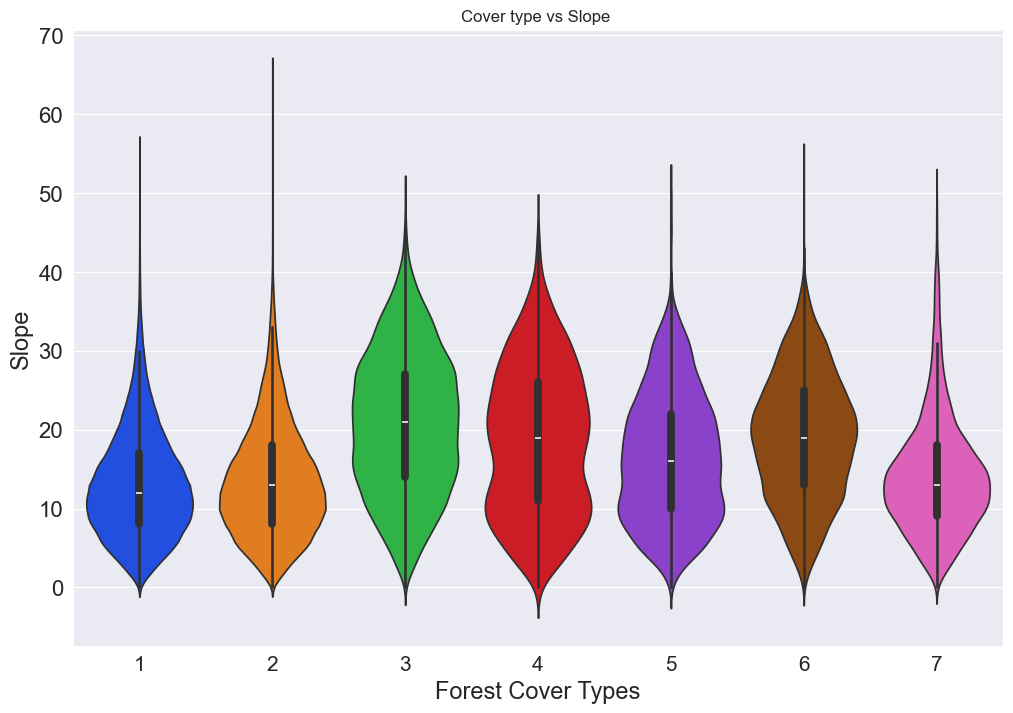

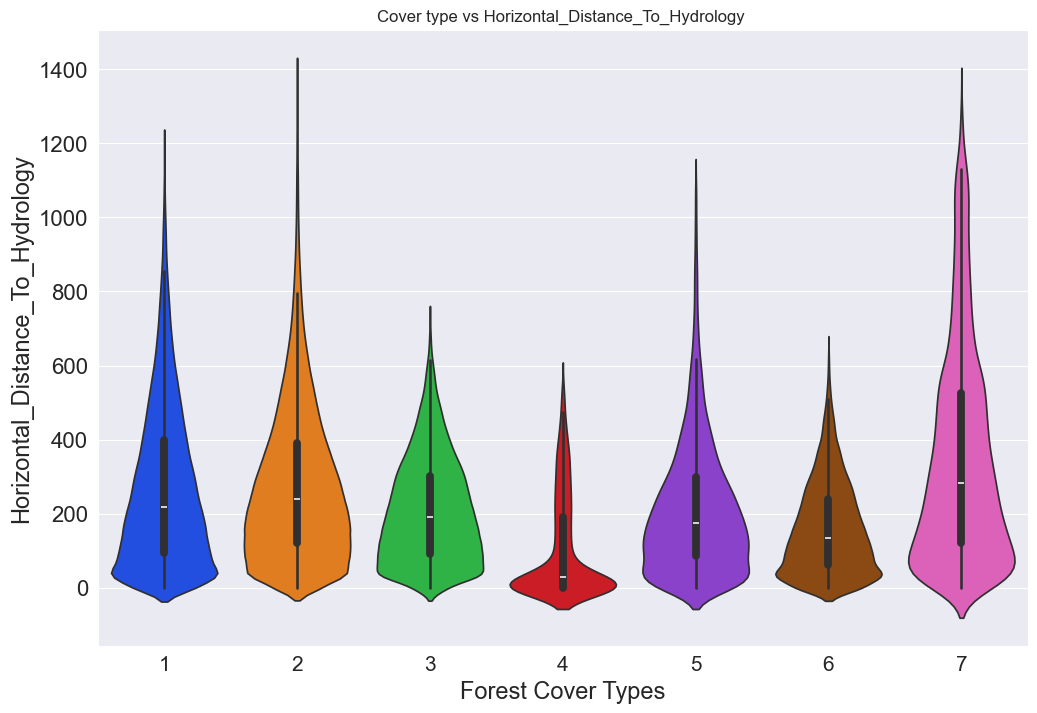

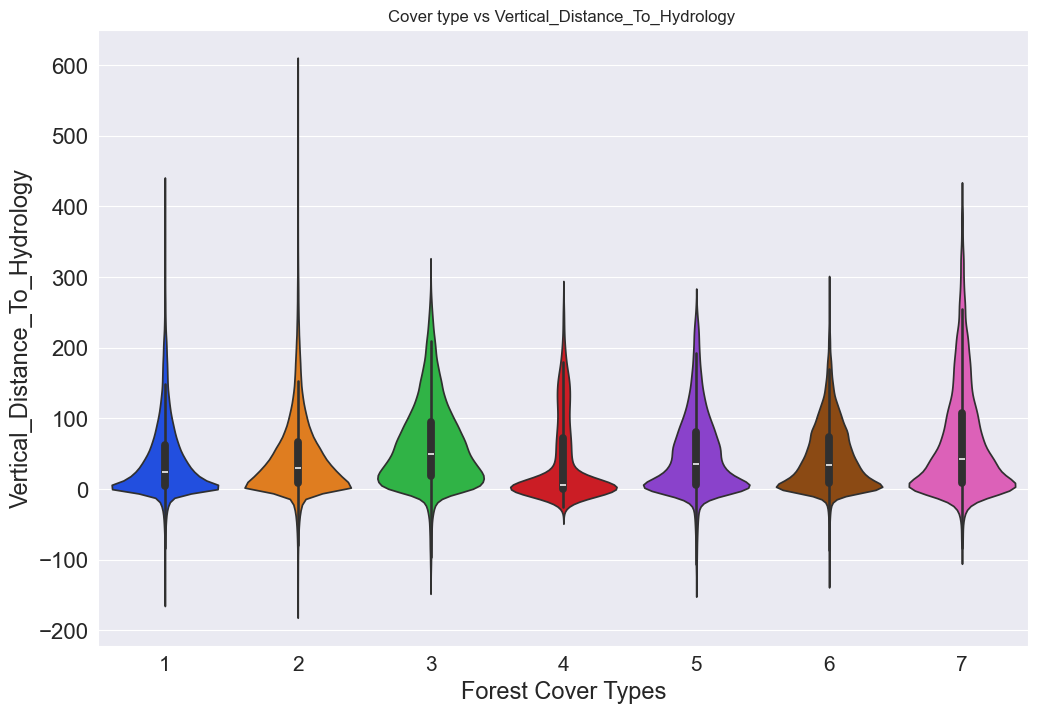

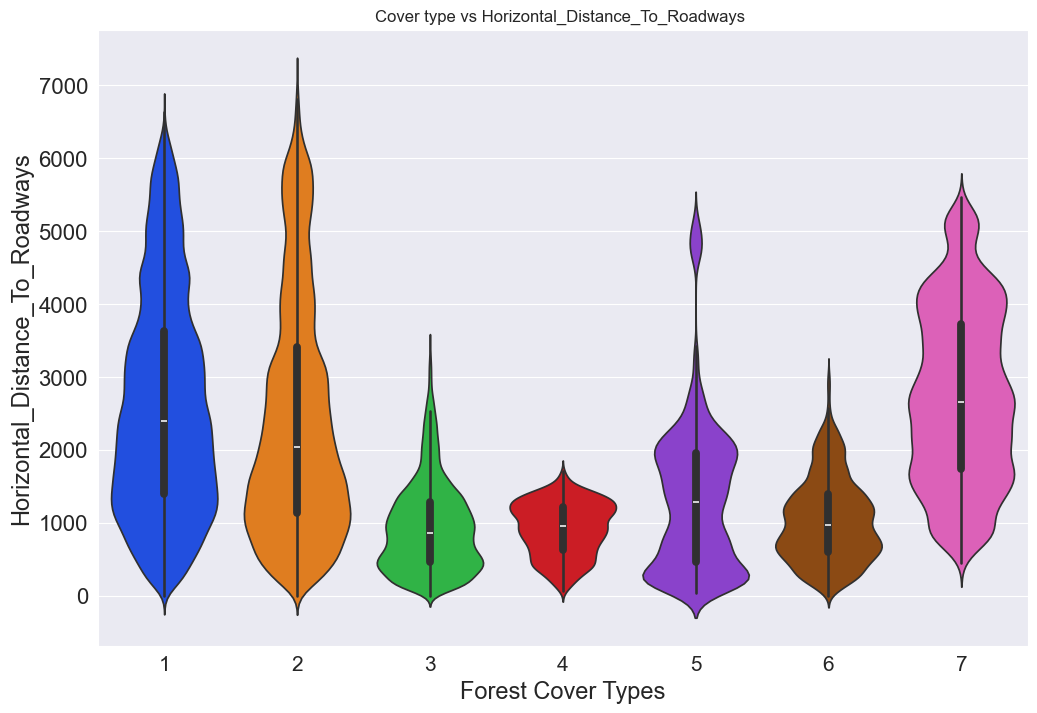

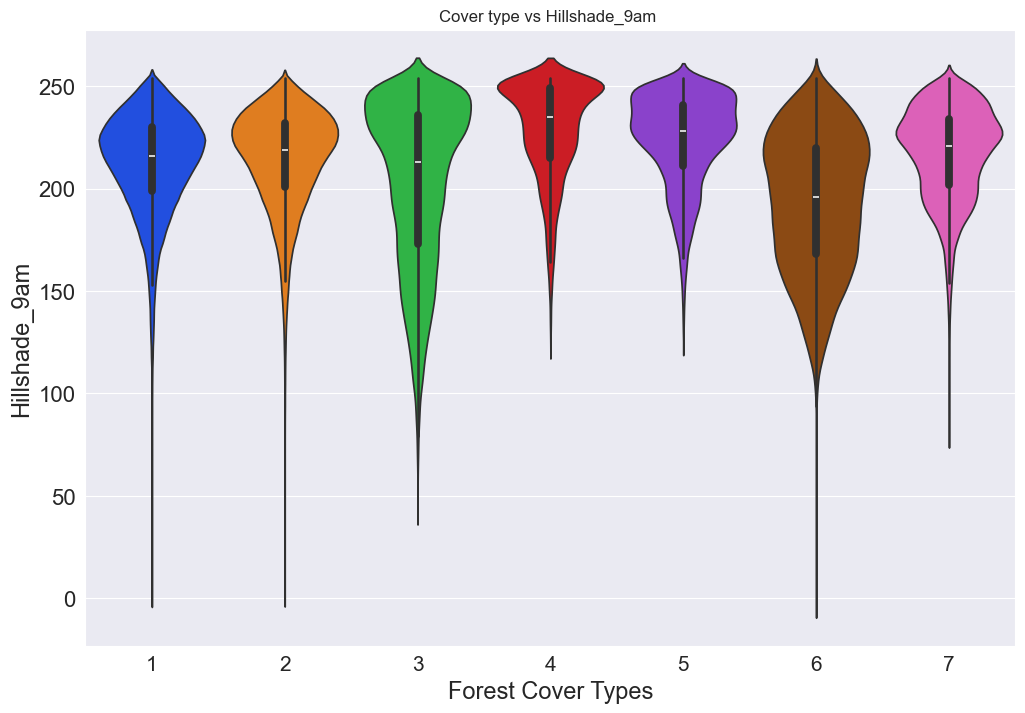

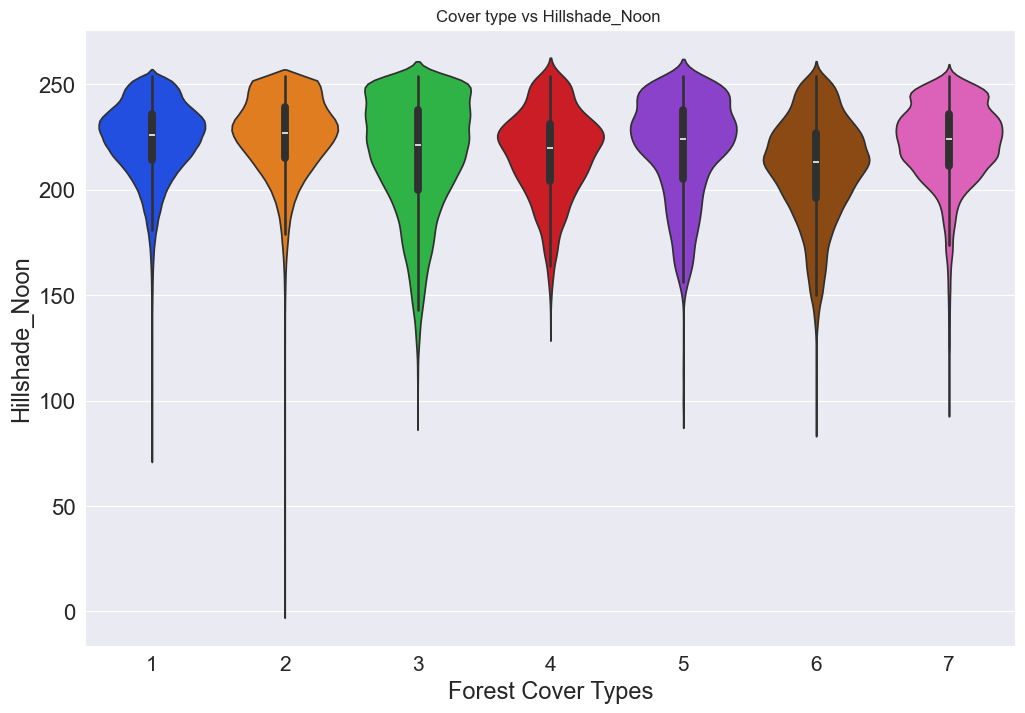

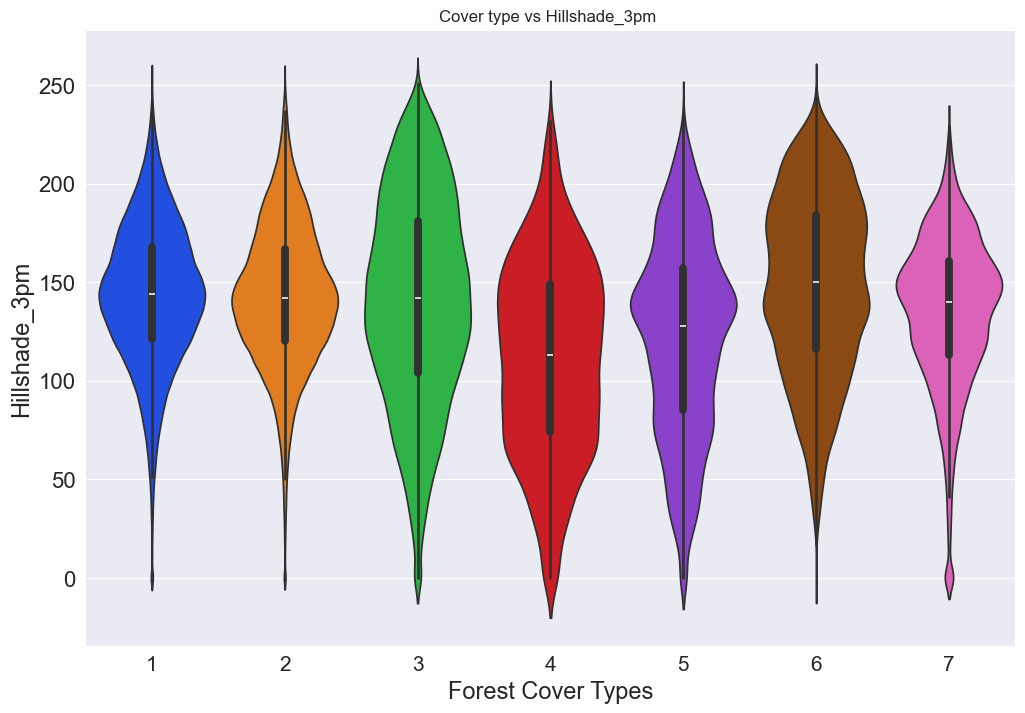

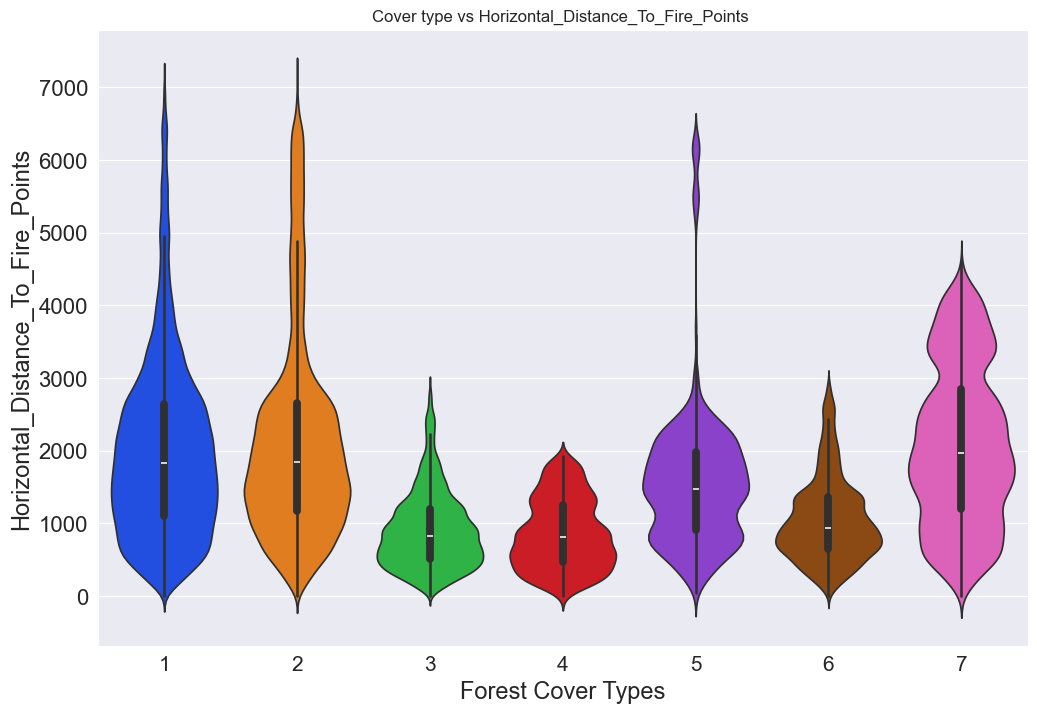

In [42]:
# plot 6
# Violin Plot (numerical features verses cover_types)


# plot bg
sns.set_style("darkgrid")
palette = sns.color_palette('bright')

size = len(numerical_features)


# plotting each feature against Class variable
for i in range(size):
    plt.subplots(figsize=(12, 8))

    # Plotting the ith feature with class column 
    sns.violinplot(data=data[numerical_features], x=data['Cover_Type'], y = numerical_features[i], palette=palette)
    
    plt.xticks(size = 15)
    plt.yticks(size = 16)
    plt.title(f'Cover type vs {numerical_features[i]} ')
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(numerical_features[i], size = 17)
  

    plt.show()

**Observation**
- `Elevation` ranges vary from class to another which makes it a very  important feature for the predictions later on beacuse it distincts `classes`. `class7` has the most elevated trees

- `Aspect` has a normal distribution
- `Horizontal and Vertical Destinatce to Hydrology` are positively skewed in all of the Cover_Types. while they vary from class to another we can say that most of them have values on the low side making them close to Water Areas
- `Horizontal distance to Hydrology` and `Horizontal distance to Roadways` are quite similar. `HENCE` one of them could be removed for `features reduction`
- `Hillshade noon` probably won't be a very importrant `feature` in the feature importance because each class is very similar in this `feature`

**Some `features` are `more` important than others for `Class Distinction` and this will be discussed more in the [Features Selection](#features-selection)**

In [43]:
# plot 7
# Grouped Bar plot  (Wilderness Area  verses cover_types)

#preparing data for plotting
# melting data because it was one hot encoded
melted_data = data.melt(id_vars=['Cover_Type'], value_vars=new_wilderness_columns,
                           var_name='Wilderness_Area', value_name='Presence')

print(melted_data)
wild_area_cover_type_counts = melted_data.groupby(['Wilderness_Area', 'Cover_Type'])['Presence'].sum()
print(wild_area_cover_type_counts)

# Resetting the index to make it a DataFrame
wild_area_cover_type_counts = wild_area_cover_type_counts.reset_index()
print(wild_area_cover_type_counts)



         Cover_Type    Wilderness_Area  Presence
0                 5  Wilderness_Area_1         1
1                 5  Wilderness_Area_1         1
2                 2  Wilderness_Area_1         1
3                 2  Wilderness_Area_1         1
4                 5  Wilderness_Area_1         1
...             ...                ...       ...
2324043           3  Wilderness_Area_4         0
2324044           3  Wilderness_Area_4         0
2324045           3  Wilderness_Area_4         0
2324046           3  Wilderness_Area_4         0
2324047           3  Wilderness_Area_4         0

[2324048 rows x 3 columns]
Wilderness_Area    Cover_Type
Wilderness_Area_1  1             105717
                   2             146197
                   3                  0
                   4                  0
                   5               3781
                   6                  0
                   7               5101
Wilderness_Area_2  1              18595
                   2              

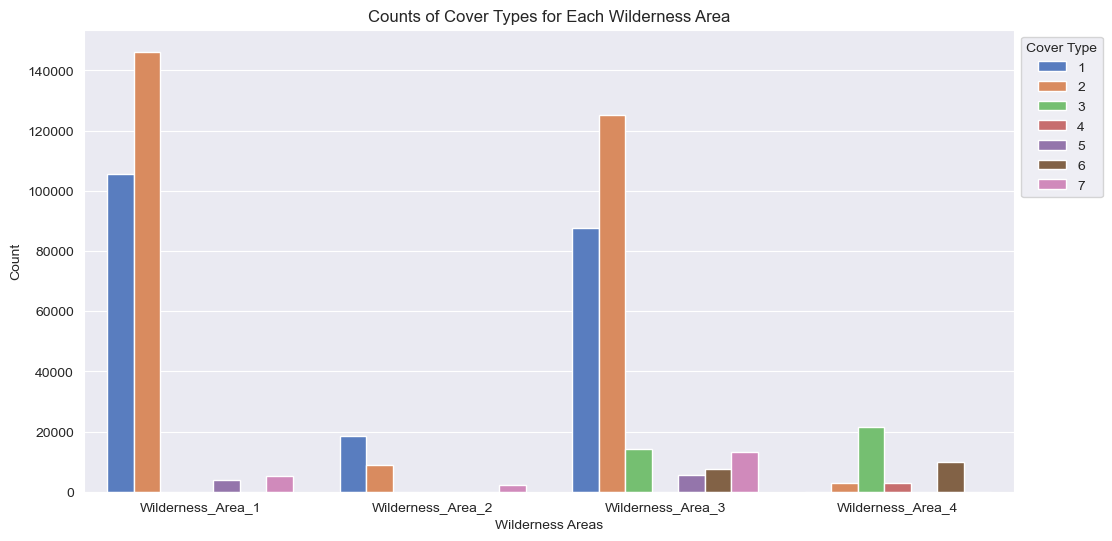

In [44]:

# plot 7 
# Grouped Bar plot  (Wilderness Area  verses cover_types)

# Creating a grouped bar plot
palette = sns.color_palette('muted')
plt.figure(figsize=(12, 6))
sns.barplot(data=wild_area_cover_type_counts, x='Wilderness_Area', y='Presence', hue='Cover_Type', palette=palette)
plt.xlabel('Wilderness Areas')
plt.ylabel('Count')
plt.title('Counts of Cover Types for Each Wilderness Area')
plt.legend(title='Cover Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Observation**
- `Cover Type 1 and 2` (blue and orange bars, respectively) are the most frequent cover types in Wilderness Areas 1 and 3.
- Some cover types appear to be `absent` or very `rare` in certain wilderness areas. For instance, Cover Type 6 is not present in Wilderness Area 2.

**Conlusion**
`Wildernerss_Areas` could be very important in class distinction  

#### Data Cleaning

##### Category Error Check

Checkin if there is an issue with the one hot encoded data 

if there is any observations where it has a 1 in more than one `Wilderness_area` or `Soil_Type`

In [45]:
# checkin for wilderness_area
wilderness_row_sum = data[new_wilderness_columns].sum(axis = 1) # summing row counts of wilderness area for each observation

# check if any row has a value more than 1 
any_values_over_one_wild = wilderness_row_sum[wilderness_row_sum > 1].any()
wilderness_statement = "There are rows with multiple wilderness areas." if any_values_over_one_wild else "No rows have multiple wilderness areas."

# checkin for soil_type
soil_row_sum = data[new_soil_columns].sum(axis = 1) # summing row counts of soil type for each observation

# check if any row has a value more than 1 
any_values_over_one_soil = soil_row_sum[soil_row_sum > 1].any()

soil_statement = "There are rows with multiple soil types ." if any_values_over_one_soil else "No rows have multiple soil types."

print(wilderness_statement, '\n',soil_statement)




No rows have multiple wilderness areas. 
 No rows have multiple soil types.


**Data has no errors for this matter**

##### Null Value Check

In [46]:

data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


**No null values**

#### Duplicates Check

In [47]:
data.duplicated().sum()

0

**No Duplicate Observations**

#### Feature Reduction

#### Feature Importance
- We have lots of features which will make the training highly computational for SVM.
- In this section we are going to do dimensionality reduction to avoid `intense computation` and `overfitting`
- I will use Some models like `RandomForest`  and `Extra Trees` to use their `feature importance` attribute to see the `impact` of the `features` on this data 
- I will get the `intersection` of the feature importances with all the `classifiers` tried (hence the features that are `included` in all Classifiers' Feature Importance and then I will probably pick the first `20`)


**Note:-**
I am going to do `feature selection` before scaling and `balancing the dataset` since I am using tree-based models (RFC, ETC, GradientBoosting, AdaBoost, CatBoost) for `feature importance`, which are generally less sensitive to the scale of the data and somewhat robust to class imbalance.<br> Since we have a big dataset, it’s more practical to perform feature selection first. This will reduce the dimensionality of the data, leading to less computational scaling and balancing steps afterward.



**Since we are going to use the same approach with differenct classifiers I am going to create a simple function instead of repeating code**

In [49]:
def train_and_get_feature_importance(classifier, classifer_name, silent = False):
    """
    Trains a given classifier on a randomly sampled subset of the dataset and returns the feature importances.

    This function takes a classifier and its name as inputs, samples 5% of the data to manage the large dataset
    trains the classifier on this sample and computes the feature importances based on the trained model.
    The feature importances are returned as a DataFrame sorted in descending order.

    Parameters:
    - classifier (classifier object): The classifier to be trained
    - classifier_name (str): A string representing the name of the classifier. Used as the column name in the returned DataFrame of feature importances.

    Returns:
    - DataFrame: A pandas DataFrame containing the feature importances, indexed by feature names and sorted in descending order of importance.
    """
    # sampling 5% because we have too many observations
    data_sample = data.sample(frac=0.05, random_state=42)

    # splitting data into features and classes
    X = data_sample.drop('Cover_Type', axis=1)
    y = data_sample['Cover_Type']
    
    # creating the model and adding a check for the cataboost silent argument becaues it is usuall set to false
    if silent:
        model = classifier(random_state = 42, silent=True)
    else:
        model = classifier(random_state = 42)
    
    # training the model
    model.fit(X, y)
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=[classifer_name]).sort_values(classifer_name, ascending=False)
    return feature_importances

In [50]:
# importing all clasiifiers used for feature importance
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from catboost import CatBoostClassifier

#### Random Forest Classifier

In [51]:

RFC_feature_importances = train_and_get_feature_importance(RandomForestClassifier, 'RFC')
RFC_feature_importances.head(20)


,RFC
Elevation,0.232778
Horizontal_Distance_To_Roadways,0.095277
Horizontal_Distance_To_Fire_Points,0.089053
Horizontal_Distance_To_Hydrology,0.060135
Vertical_Distance_To_Hydrology,0.059464
Aspect,0.058054
Hillshade_Noon,0.054119
Hillshade_3pm,0.053577
Hillshade_9am,0.052250
Slope,0.043039




#### Extra Trees Classifier


In [52]:
ETC_feature_importances = train_and_get_feature_importance(ExtraTreesClassifier, 'ETC')
ETC_feature_importances.head(10)

,ETC
Elevation,0.184773
Horizontal_Distance_To_Roadways,0.088582
Horizontal_Distance_To_Fire_Points,0.085190
Horizontal_Distance_To_Hydrology,0.062219
Aspect,0.061393
Vertical_Distance_To_Hydrology,0.060328
Hillshade_Noon,0.057528
Hillshade_3pm,0.055319
Hillshade_9am,0.054415
Slope,0.049824



#### Gradient Boosting Classifier


In [53]:
GBC_feature_importances = train_and_get_feature_importance(GradientBoostingClassifier, 'GBC')
GBC_feature_importances.head(10)


,GBC
Elevation,0.634084
Horizontal_Distance_To_Roadways,0.054942
Horizontal_Distance_To_Hydrology,0.041179
Horizontal_Distance_To_Fire_Points,0.041048
Hillshade_Noon,0.030093
Wilderness_Area_1,0.023223
Soil_Type_22,0.015458
Soil_Type_4,0.015105
Vertical_Distance_To_Hydrology,0.013005
Soil_Type_2,0.012840



#### ADABoost Classifier


In [54]:
ADA_feature_importances = train_and_get_feature_importance(AdaBoostClassifier, 'ADA')
ADA_feature_importances.head(10)

,ADA
Elevation,0.94
Horizontal_Distance_To_Hydrology,0.02
Vertical_Distance_To_Hydrology,0.02
Soil_Type_4,0.02
Soil_Type_28,0.00
Soil_Type_18,0.00
Soil_Type_19,0.00
Soil_Type_20,0.00
Soil_Type_21,0.00
Soil_Type_22,0.00



#### CatBoost Classifier


In [55]:

CAT_feature_importances = train_and_get_feature_importance(CatBoostClassifier, 'CAT', silent = True)
CAT_feature_importances.head(10)

,CAT
Elevation,29.107491
Horizontal_Distance_To_Roadways,14.895147
Horizontal_Distance_To_Fire_Points,13.065207
Horizontal_Distance_To_Hydrology,5.659028
Vertical_Distance_To_Hydrology,5.094221
Hillshade_Noon,4.480617
Aspect,4.166312
Hillshade_9am,3.786923
Wilderness_Area_3,3.134154
Wilderness_Area_1,3.038155


In [56]:
# Finding the most common features  across all classifiers 

# defining top size 
top_size = 20

#get the top 20 features names from each DataFrame
top_RFC = RFC_feature_importances.head(top_size).index.tolist()
top_ETC = ETC_feature_importances.head(top_size).index.tolist()
top_GBC = GBC_feature_importances.head(top_size).index.tolist()
top_ADA = ADA_feature_importances.head(top_size).index.tolist()
top_CAT = CAT_feature_importances.head(top_size).index.tolist()

# combining
all_top_features = top_RFC + top_ETC + top_GBC + top_ADA + top_CAT

# converting it pandas series to get value counts
all_top_features = pd.Series(all_top_features)

# common ones
common_features = all_top_features.value_counts()
common_features.head(30)

Elevation                             5
Horizontal_Distance_To_Hydrology      5
Vertical_Distance_To_Hydrology        5
Soil_Type_22                          5
Soil_Type_4                           5
Soil_Type_23                          5
Wilderness_Area_3                     4
Horizontal_Distance_To_Fire_Points    4
Aspect                                4
Hillshade_Noon                        4
Hillshade_9am                         4
Horizontal_Distance_To_Roadways       4
Soil_Type_31                          3
Soil_Type_29                          3
Soil_Type_32                          3
Soil_Type_2                           3
Wilderness_Area_1                     3
Wilderness_Area_4                     3
Slope                                 3
Hillshade_3pm                         3
Soil_Type_12                          3
Soil_Type_10                          2
Soil_Type_38                          2
Soil_Type_39                          2
Soil_Type_24                          1


**Observation** 

- Only `6` features were present in the top `30` of all classifiers feature importances with a value count of `5`
-  around `24` Features were present in at least 2 classifiers' top 30 feature importances

**Conclusion** I will select the first `24` Features to `reduce` the `dimensionality` of the problem and help decrease `computaion time` of `SVM`

In [57]:
top_features = common_features.head(24).index.to_list()
top_features

['Elevation',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Soil_Type_22',
 'Soil_Type_4',
 'Soil_Type_23',
 'Wilderness_Area_3',
 'Horizontal_Distance_To_Fire_Points',
 'Aspect',
 'Hillshade_Noon',
 'Hillshade_9am',
 'Horizontal_Distance_To_Roadways',
 'Soil_Type_31',
 'Soil_Type_29',
 'Soil_Type_32',
 'Soil_Type_2',
 'Wilderness_Area_1',
 'Wilderness_Area_4',
 'Slope',
 'Hillshade_3pm',
 'Soil_Type_12',
 'Soil_Type_10',
 'Soil_Type_38',
 'Soil_Type_39']

In [58]:
# Making a copy of the dataframe with only these features + Target
columns_names = top_features + ['Cover_Type']
data_features_reduced = data[columns_names].copy()

features_after_reduced = data_features_reduced.shape[1]-1 # excluding class column

print(f'We started with {features-1} Features and now we have {features_after_reduced}\n effictively reducing {features-features_after_reduced-1} features')


We started with 54 Features and now we have 24
 effictively reducing 30 features


#### Numerical Feature Scaling

**to prepare data for SVM I am going to scale the `numerical` features to a `range of (0,1)`, and leave `categorical` unchanged since they are of values `0 or 1`** 


In [59]:
from sklearn.preprocessing import MinMaxScaler


# Initializing the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scaling  the numerical features to be between 0 and 1
data_features_reduced[numerical_features] = min_max_scaler.fit_transform(data_features_reduced[numerical_features])

data_scaled_reduced = data_features_reduced.copy()
data_scaled_reduced.head()

,Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type_22,Soil_Type_4,Soil_Type_23,Wilderness_Area_3,Horizontal_Distance_To_Fire_Points,Aspect,Hillshade_Noon,Hillshade_9am,Horizontal_Distance_To_Roadways,Soil_Type_31,Soil_Type_29,Soil_Type_32,Soil_Type_2,Wilderness_Area_1,Wilderness_Area_4,Slope,Hillshade_3pm,Soil_Type_12,Soil_Type_10,Soil_Type_38,Soil_Type_39,Cover_Type
0,0.368684,0.184681,0.223514,0,0,0,0,0.875366,0.141667,0.913386,0.870079,0.071659,0,1,0,0,1,0,0.045455,0.582677,0,0,0,0,5
1,0.365683,0.151754,0.215762,0,0,0,0,0.867838,0.155556,0.925197,0.866142,0.054798,0,1,0,0,1,0,0.030303,0.594488,0,0,0,0,5
2,0.472736,0.191840,0.307494,0,0,0,0,0.853339,0.386111,0.937008,0.921260,0.446817,0,0,0,0,1,0,0.136364,0.531496,1,0,0,0,2
3,0.463232,0.173228,0.375969,0,0,0,0,0.865886,0.430556,0.937008,0.937008,0.434172,0,0,0,0,1,0,0.272727,0.480315,0,0,0,0,2
4,0.368184,0.109520,0.222222,0,0,0,0,0.860449,0.125000,0.921260,0.866142,0.054939,0,1,0,0,1,0,0.030303,0.590551,0,0,0,0,5


#### Exporting reduced and scaled dataset

In [ ]:
# # commenting this code because it is already exported

# # exporting scaled and feature reduced dataset
# data_scaled_reduced.to_csv('./data/cover_type_scaled_reduced.csv', index=False)

#### Balancing Dataset
**DownSampling?**


**At this point the only thing left in preparing this data is to handle the class imbalancy problem refer to  [Class Imabalncy](#target_distribution) or  [Visuals](#class-distribution)** 

- Remember that the number of observations of `Class 4` (the least present class) is `2747` hence if we select all of them we can only have at most `2747` observations for each class 


In [60]:
# the number of observations in the smallest class
min_class_size = data_scaled_reduced['Cover_Type'].value_counts().min()

# Creating empty dataframe
balanced_data = pd.DataFrame()

for cover_type in data_scaled_reduced['Cover_Type'].unique():
    class_subset = data_scaled_reduced[data_scaled_reduced['Cover_Type'] == cover_type].sample(n=min_class_size, random_state=42)
    balanced_data = pd.concat([balanced_data, class_subset], axis=0)

# Shuffling the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_data.head()

,Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type_22,Soil_Type_4,Soil_Type_23,Wilderness_Area_3,Horizontal_Distance_To_Fire_Points,Aspect,Hillshade_Noon,Hillshade_9am,Horizontal_Distance_To_Roadways,Soil_Type_31,Soil_Type_29,Soil_Type_32,Soil_Type_2,Wilderness_Area_1,Wilderness_Area_4,Slope,Hillshade_3pm,Soil_Type_12,Soil_Type_10,Soil_Type_38,Soil_Type_39,Cover_Type
0,0.458229,0.151754,0.338501,0,0,0,0,0.832427,0.333333,0.834646,0.992126,0.468877,0,0,0,0,1,0,0.363636,0.287402,0,0,0,0,5
1,0.450725,0.244810,0.262274,0,1,0,1,0.309773,0.436111,0.940945,0.933071,0.339188,0,0,0,0,0,0,0.287879,0.488189,0,0,0,0,3
2,0.216608,0.183250,0.390181,0,0,0,0,0.124076,0.377778,0.901575,0.968504,0.200787,0,0,0,0,0,1,0.287879,0.409449,0,0,0,0,4
3,0.599800,0.121689,0.282946,0,0,1,1,0.205772,0.708333,0.972441,0.763780,0.261487,0,0,0,0,0,0,0.166667,0.755906,0,0,0,0,1
4,0.199600,0.000000,0.223514,0,0,0,0,0.079325,0.188889,0.921260,0.874016,0.109737,0,0,0,0,0,1,0.045455,0.582677,0,1,0,0,4


In [61]:
balanced_data['Cover_Type'].value_counts(), len(balanced_data)

(Cover_Type
 5    2747
 3    2747
 4    2747
 1    2747
 6    2747
 2    2747
 7    2747
 Name: count, dtype: int64,
 19229)

**We have now solved the Imbalancy dataset issue and have also reduced the number of observations to `19229`**
- We are  going to use this balanced dataset as the `training dataset` and I am going to use the `The Entire Original Dataset`  after reduction and scaling as the test dataset 


`Commented Below code because already exported the data` you can find it `data` folder

In [62]:
# # exporting train data which is  the data after balancing
# balanced_data.to_csv('./data/balanced_train.csv', index=False)



## SVM Evaluation

### SVM on balanced dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import dill
from tqdm import tqdm
from sklearn.metrics import f1_score,classification_report
import numpy as np
from scipy.stats import uniform, randint

In [48]:
train = pd.read_csv('./data/balanced_train.csv')
test = pd.read_csv('./data/cover_type_scaled_reduced.csv')

In [49]:
train.head()

,Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type_22,Soil_Type_4,Soil_Type_23,Wilderness_Area_3,Horizontal_Distance_To_Fire_Points,Aspect,Hillshade_Noon,...,Soil_Type_2,Wilderness_Area_1,Wilderness_Area_4,Slope,Hillshade_3pm,Soil_Type_12,Soil_Type_10,Soil_Type_38,Soil_Type_39,Cover_Type
0,0.458229,0.151754,0.338501,0,0,0,0,0.832427,0.333333,0.834646,...,0,1,0,0.363636,0.287402,0,0,0,0,5
1,0.450725,0.244810,0.262274,0,1,0,1,0.309773,0.436111,0.940945,...,0,0,0,0.287879,0.488189,0,0,0,0,3
2,0.216608,0.183250,0.390181,0,0,0,0,0.124076,0.377778,0.901575,...,0,0,1,0.287879,0.409449,0,0,0,0,4
3,0.599800,0.121689,0.282946,0,0,1,1,0.205772,0.708333,0.972441,...,0,0,0,0.166667,0.755906,0,0,0,0,1
4,0.199600,0.000000,0.223514,0,0,0,0,0.079325,0.188889,0.921260,...,0,0,1,0.045455,0.582677,0,1,0,0,4


In [5]:
train.shape

(19229, 25)

In [6]:
test.shape

(581012, 25)

In [7]:
test.head()

,Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type_22,Soil_Type_4,Soil_Type_23,Wilderness_Area_3,Horizontal_Distance_To_Fire_Points,Aspect,Hillshade_Noon,...,Soil_Type_2,Wilderness_Area_1,Wilderness_Area_4,Slope,Hillshade_3pm,Soil_Type_12,Soil_Type_10,Soil_Type_38,Soil_Type_39,Cover_Type
0,0.368684,0.184681,0.223514,0,0,0,0,0.875366,0.141667,0.913386,...,0,1,0,0.045455,0.582677,0,0,0,0,5
1,0.365683,0.151754,0.215762,0,0,0,0,0.867838,0.155556,0.925197,...,0,1,0,0.030303,0.594488,0,0,0,0,5
2,0.472736,0.191840,0.307494,0,0,0,0,0.853339,0.386111,0.937008,...,0,1,0,0.136364,0.531496,1,0,0,0,2
3,0.463232,0.173228,0.375969,0,0,0,0,0.865886,0.430556,0.937008,...,0,1,0,0.272727,0.480315,0,0,0,0,2
4,0.368184,0.109520,0.222222,0,0,0,0,0.860449,0.125000,0.921260,...,0,1,0,0.030303,0.590551,0,0,0,0,5


In [50]:
X_train_feature = train.iloc[:, :-1]  
y_train_target = train.iloc[:, -1]
X_test_feature = test.iloc[:, :-1]
y_test_target = test.iloc[:, -1]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_train_feature, y_train_target, test_size=0.30, random_state=42)

In [52]:
X_train.shape

(13460, 24)

In [55]:
X_test.shape

(5769, 24)

In [53]:
y_train.shape

(13460,)

In [54]:
y_test.shape

(5769,)

## HyperParameter Tuning

### Using RandomizedSearchCV()

1. `svm = SVC()`: This line creates an instance of the Support Vector Machine (SVM) classifier with default hyperparameter settings. We'll use this classifier as our base model for hyperparameter tuning.

2. `param_dist`: This dictionary defines the hyperparameter space to be explored during the random search. Specifically, it defines a range of values for the hyperparameters `C` and `gamma`, and specifies the kernel function to be used as `'rbf'`. `uniform(0.1, 10)` and `uniform(0.1, 1)` are used to generate continuous random variables uniformly distributed between 0.1 and 10 for `C` and between 0.1 and 1 for `gamma`, respectively.

3. `RandomizedSearchCV`: This class performs randomized search over the hyperparameter space defined by `param_dist`. It uses cross-validation (`cv=5`) to evaluate the performance of each combination of hyperparameters. `n_iter=100` specifies the number of parameter settings that are sampled. `random_state=42` sets the random seed for reproducibility.

4. `random_search.fit(X_train, y_train)`: This method fits the randomized search estimator to the training data. It searches for the best combination of hyperparameters by evaluating the performance of the SVM classifier with different settings using cross-validation.

5. `print("Best parameters found: ", random_search.best_params_)`: After fitting the randomized search estimator, this line prints out the best combination of hyperparameters found during the search process.



In [13]:
svm = SVC()

# Define hyperparameters to search
param_dist = {
    'C': uniform(0.1, 10),
    'gamma': uniform(0.1, 1),
    'kernel': ['rbf'],
}

# Perform Randomized Search
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'C': 9.494989415641891, 'gamma': 0.9948273504276488, 'kernel': 'rbf'}


In [56]:
# Predicting the model on the train set
svm_rbf = SVC(kernel='rbf', gamma=0.9948273504276488, C= 9.494989415641891)
svm_rbf.fit(X_train, y_train)

SVC(C=9.494989415641891, gamma=0.9948273504276488)

In [59]:
y_pred_train = svm_rbf.predict(X_test)

In [60]:
f1_training = f1_score(y_test, y_pred_train,average='weighted')
print("Training set f1-score:",f1_training)

Training set f1-score: 0.787860220755139


In [63]:
y_pred_test = svm_rbf.predict(X_test_feature)

In [64]:
# Calculate the accuracy of the model
accuracy_test = accuracy_score(y_test_target, y_pred_test)
print("Accuracy:",accuracy_test)
f1_test = f1_score(y_test_target, y_pred_test,average='macro')
print("Test set f1-score:",f1_test)

Accuracy: 0.6664457876945743
Test set f1-score: 0.575383832222729


In [66]:
class_report = classification_report(y_test_target, y_pred_test)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.72      0.72    211840
           2       0.83      0.59      0.69    283301
           3       0.72      0.65      0.69     35754
           4       0.32      0.95      0.48      2747
           5       0.15      0.90      0.26      9493
           6       0.42      0.75      0.53     17367
           7       0.50      0.95      0.66     20510

    accuracy                           0.67    581012
   macro avg       0.52      0.79      0.58    581012
weighted avg       0.75      0.67      0.69    581012



**RandomSearch CV Observatrion**:- 
- `Training set` f1-score: 0.787860220755139
- `Test set` f1-score: 0.575383832222729


## Using GridSearchCV

#### Parameter Grid
The `param_grid` dictionary defines a grid of hyperparameters to search through. It specifies different values to be tested for `C` (regularization parameter), `gamma` (kernel coefficient), and `kernel` (type of kernel function). For instance:
- `C` is tested with values `[1, 10, 100]`.
- `gamma` is tested with values `[0.05, 0.5, 5]`.
- `kernel` is tested with values `['rbf', 'poly', 'sigmoid']`.

#### Best Hyperparameters
After the grid search is complete, the best combination of hyperparameters is determined based on the highest average accuracy across all cross-validation folds. The printed output displays the best hyperparameters found by the grid search.


In [11]:
param_grid = {
    'C': [1,10, 100],
    'gamma': [ 0.05,0.5, 5],
    'kernel': ['rbf', 'poly','sigmoid']
}

# Instantiate the SVM classifier
svm = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 100, 'gamma': 5, 'kernel': 'rbf'}


In [28]:
# Predicting the model on the train set
best_svm = grid_search.best_estimator_
y_pred_train = best_svm.predict(X_test)


In [29]:
accuracy_train = accuracy_score(y_test, y_pred_train)
print("Accuracy on training set:",accuracy_train)
f1_training = f1_score(y_test, y_pred_train,average='macro')
print("F1 on training set:",f1_training)

Accuracy on training set: 0.8450338013520541
F1 on training set: 0.8430260709398538


In [30]:
y_pred_test = best_svm.predict(X_test_feature)

In [31]:
# Calculate the accuracy of the model
accuracy_test = accuracy_score(y_test_target, y_pred_test)
print("Accuracy on test set:",accuracy_test)
f1_test = f1_score(y_test_target, y_pred_test,average='macro')
print("F1 on test set:",f1_test)

Accuracy on test set: 0.7198818613040695
F1 on test set: 0.6779477918011622


In [32]:
class_report = classification_report(y_test_target, y_pred_test)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.73      0.73    211840
           2       0.83      0.67      0.74    283301
           3       0.81      0.78      0.80     35754
           4       0.56      0.97      0.71      2747
           5       0.25      0.95      0.40      9493
           6       0.53      0.85      0.66     17367
           7       0.57      0.96      0.72     20510

    accuracy                           0.72    581012
   macro avg       0.61      0.85      0.68    581012
weighted avg       0.76      0.72      0.73    581012



**Observation**
- F1 on training set: 0.8430260709398538
- F1 on test set: 0.6779477918011622


#### Balanced Data Conclusion

- The model performed `poorly` with this `balanced_dataset`. This is probably due to the `downsampling` method that we used to  handle the imbalanced dataset
- Picking around 2700 observatiosn only from each class to match `Class4` came at the cost of `losing` a lot of information about majority classes such as `class 1 and 2`
- Other Methods could've been used like `Upsampling` but since we have a dataset with over `half a million observations` this would've been costly in terms of computation afterwards and coul also lead to `Overfitting`

## SVM on the unbalanced dataset

In [118]:
X = test.iloc[:, :-1]
y = test.iloc[:, -1]

### Splitting Dataset for Training and Testing: 

Divide the dataset into two parts for training and testing the model, with 95% of the data reserved for testing.


In [119]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

## SVM using weighted parameter

### Class Weight Calculation
- We calculated weights using `inverse of the class frequencies`

- The formula used is the following:-

$\text{weight}(i) = \frac{\text{total number of samples}}{\text{number of classes} \times \text{number of samples in class } i}$


- **Total Samples and Number of Classes**:
  - `total_samples`: Represents the total number of samples in the dataset.
  - `num_classes`: Indicates the total number of unique classes in the dataset.

- **Calculating Weights**:
  - `class_counts`: Contains the number of samples for each class.
  - `weights`: Computes weights for each class label to balance the class distribution.

- **Creating Weight Dictionary**:
  - `weights_dict`: Generates a dictionary assigning weights to each class label.

In [104]:
unique_values, class_counts = np.unique(y_train, return_counts = True)
unique_values, class_counts 

(array([1, 2, 3, 4, 5, 6, 7]),
 array([10632, 14103,  1792,   140,   467,   862,  1054], dtype=int64))

In [92]:
# Calculating weights
total_samples = class_counts.sum()
num_classes = len(class_counts)
weights = total_samples / (num_classes * class_counts)

# Creating a dictionary of weights for class labels starting from 1
weights_dict = {i + 1: weight for i, weight in enumerate(weights)}

weights_dict

{1: 0.39033107599699024,
 2: 0.29426363185137916,
 3: 2.3158482142857144,
 4: 29.642857142857142,
 5: 8.886509635974305,
 6: 4.814385150812065,
 7: 3.937381404174573}

#### Class Weighting for Handling Imbalance: Assigning weights to each class label, with higher weights for underrepresented classes to improve model performance on minority classes during training.


In [130]:
svm_rbf = SVC(kernel='rbf', gamma=10, C= 4, class_weight = weights_dict)
svm_rbf.fit(X_train_selected,y_train)

SVC(C=4,
    class_weight={1: 0.39033107599699024, 2: 0.29426363185137916,
                  3: 2.3158482142857144, 4: 29.642857142857142,
                  5: 8.886509635974305, 6: 4.814385150812065,
                  7: 3.937381404174573},
    gamma=10)

In [131]:
y_pred_train = svm_rbf.predict(X_train_selected)

# Calculating the accuracy of the model
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:",accuracy_train)

Accuracy: 0.8418932874354561


In [132]:
f1_training = f1_score(y_train, y_pred_train, average='weighted')
print("Training set f1-score:",f1_training)


Training set f1-score: 0.8454580004045166


In [133]:
y_pred_test = svm_rbf.predict(X_test_selected)

In [134]:
# Calculating the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy:",accuracy_test)

Accuracy: 0.794331856178505


In [135]:
f1_test = f1_score(y_test, y_pred_test,average='weighted')
print("Test set f1-score:",f1_test)

Test set f1-score: 0.8001074631513105


In [ ]:
class_report = classification_report(y_test, y_pred_test)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80    201208
           2       0.86      0.78      0.81    269198
           3       0.75      0.77      0.76     33962
           4       0.58      0.66      0.62      2607
           5       0.34      0.74      0.47      9026
           6       0.52      0.75      0.61     16505
           7       0.71      0.88      0.78     19456

    accuracy                           0.79    551962
   macro avg       0.65      0.77      0.69    551962
weighted avg       0.80      0.79      0.79    551962



### Conlusion With Weight Paramaters (unbalanced)

- `Training` set f1-score: 0.8497124602082272
- `Test` set f1-score: 0.7921141240994684

**Conclusion**:- 
- Scores `improved` significantly by using the `inbalanced dataset` without any downsampling techincues but applying `Class Weights` to handle Imbalancy
- Better Model than the model used on the `balanced dataset`

### SVM without weight parameters (unbalanced)

#### Let's try SVM with params { 'C': ['1'], 'gamma': ['0.5']}

In [125]:
svm_rbf = SVC(kernel='rbf', gamma=10, C= 4)
svm_rbf.fit(X_train_selected,y_train)

SVC(C=4, gamma=10)

In [126]:
y_pred_train = svm_rbf.predict(X_train_selected)

# Calculating the accuracy of the model
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:",accuracy_train)

Accuracy: 0.8837177280550774


In [127]:
f1_training = f1_score(y_train, y_pred_train, average='weighted')
print("Training set f1-score:",f1_training)

Training set f1-score: 0.8820075580355096


In [128]:
y_pred_test = svm_rbf.predict(X_test_selected)

In [129]:
# Calculating the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy:",accuracy_test)
f1_test = f1_score(y_test, y_pred_test,average='weighted')
print("Test set f1-score:",f1_test)

Accuracy: 0.8329124106369641
Test set f1-score: 0.8301837401309426


### All Models Evaluation:

- **RandomizedCV vs. GridSearchCV on `balanced` data**: 
    - GridSearchCV received higher scores, with a training set F1-score of 0.843 and a test set F1-score of 0.678, than RandomizedCV, which produced a training set F1-score of 0.788 and a test set F1-score of 0.575. In this case, GridSearchCV outperformed RandomizedCV.


- **SVM with Weighted Parameter vs. SVM without Weighted Parameter**: 
  - With a training set F1-score of 0.882 and a test set F1-score of 0.830, using non-weighted parameters  in SVM  `surprisingly` produced better performance, suggesting better handling of class imbalance. On the other hand, SVM with weighted parameters and certain hyperparameters ('C': 4, 'gamma': 10) produced comparable results, with an F1-score of 0.840 for the training set and 0.802 for the test set.

| Method                                            | Training Set F1-score | Test Set F1-score |
|---------------------------------------------------|-----------------------|-------------------|
| RandomizedCV(balanced)                                    | 0.788                 | 0.575             |
| GridSearchCV(balaned)                                      | 0.843                 | 0.678             |
| SVM with Weighted Parameter                      | 0.840                 | 0.80             |
| SVM without Weighted Parameter  | 0.882             | 0.830            |


#### Conclusion
 `Forest_Cover_Types` could be `predicted` using `SVM` up to around `88%` Accuracy

#### Notes

-This project was a fun/challenging project. We sure picked a `complex` dataset for `local` setups with lots of `observations` and `features`

 and we did face a lot of computational issues withing this project, but we learned alot through it